<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Fake real News
---


In [1]:
import textblob

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline


C:\Users\mjors_000\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# read yelp.csv into a DataFrame
url = 'C:/Users/mjors_000/Desktop/ECON628-01-berenger92/datasets/fake_real_news/fake_or_real_news.csv/fake_or_real_news.csv'
fake = pd.read_csv(url, encoding='unicode-escape')

In [6]:
fake.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillaryâs Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"â Kaydee King (@KaydeeKing) November 9, 2016...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
# Create a new DataFrame called news_real_fake that only contains the fake or real news
news_real_fake = fake[(fake.label=='FAKE') | (fake.label=='REAL')]

In [9]:
# define X and y
X = news_real_fake.text
y = news_real_fake.label
print y.value_counts(normalize=True)
print ''
print X.shape, y.shape


REAL    0.500552
FAKE    0.499448
Name: label, dtype: float64

(6335L,) (6335L,)


In [10]:
# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print X_train.shape, y_train.shape
print ''
print X_test.shape, y_test.shape

(4751L,) (4751L,)

(1584L,) (1584L,)


In [11]:
X_train[0]

u'Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word \xe2\x80\x9cunprecedented\xe2\x80\x9d has been thrown around so often this election that it ought to be retired. But it\xe2\x80\x99s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that\xe2\x80\x99s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary\xe2\x80\x99s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary\xe2\x80\x99s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn\xe2\x80\x99t be too surprising if the Clintons or their allies were to start running att

## Part 2: Tokenization

- **What:** Separate text into units such as sentences or words
- **Why:** Gives structure to previously unstructured text
- **Notes:** Relatively easy with English language text, not easy with some languages

From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect **numerical feature vectors with a fixed size** rather than the **raw text documents with variable length**.

We will use [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to "convert text into a matrix of token counts":s.


### Count Vectorizer: a model like tree or lasso, that counts frequency of tokens/word. Then we fit it on the train, and print features/most common words or expressions.

In [12]:
##############################################################################
# use CountVectorizer to create document-term matrices from X_train and X_test
##############################################################################

vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [13]:
# rows are documents, columns are terms (phrases) (aka "tokens" or "features")
print X_train_dtm.shape
print X_test_dtm.shape
# Why do they have the same number of features

(4751, 67180)
(1584, 67180)


In [14]:
# first 50 features
print vect.get_feature_names()[:50]

[u'00', u'000', u'0000', u'000000031', u'00000031', u'000035', u'00006', u'0001', u'0001pt', u'000billion', u'000ft', u'000km', u'000x', u'000\xe2', u'001', u'0011', u'003', u'005', u'005s', u'006', u'006s', u'007s', u'007\xe2', u'008s', u'009', u'00am', u'00p', u'00pm', u'01', u'010', u'012', u'013', u'015', u'018', u'01am', u'02', u'020', u'022', u'024', u'025', u'027', u'028', u'03', u'030', u'031', u'0325', u'033', u'034', u'035', u'039']


In [15]:
# last 50 features
print vect.get_feature_names()[-50:]

[u'zova', u'zucchini', u'zuccotti', u'zuck', u'zucker', u'zuckerberg', u'zuckerburg', u'zucman', u'zuesse', u'zukowski', u'zulema', u'zulia', u'zulu', u'zulus', u'zulus\xe2', u'zulu\xe2', u'zuma', u'zuniga', u'zurich', u'zurita', u'zuroff', u'zuylen', u'zvai', u'zvezda', u'zvi', u'zvulun', u'zwanzig', u'zweiter', u'zwick', u'zwischenmenschlicher', u'zxycmwjdxj', u'zyuganov', u'z\xe2', u'\xb91000', u'\xb9500', u'\xba\xf0', u'\xe2\xbc', u'\xe2\xbd', u'\xe3\xaatre', u'\xe3\xaatre\xe2', u'\xe5\xb950', u'\xee\xb2', u'\xee\xb5\xee', u'\xee\xbd\xee\xb9\xee\xba\xee', u'\xf0\xb2\xf0\xbd\xf0', u'\xf0\xb3', u'\xf0\xb9', u'\xf0\xba\xf0', u'\xf0\xbe\xf0\xba\xf1', u'\xf8\xb9\xf8']


In [16]:
# show vectorizer options
vect

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

[CountVectorizer documentation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

- **lowercase:** boolean, True by default
- Convert all characters to lowercase before tokenizing.

In [17]:
#Create a count vectorizer that doesn't lowercase the words
vect = CountVectorizer(lowercase=False)
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape # has more features

(4751, 82963)

In [18]:
# first 50 features
print vect.get_feature_names()[:50]

[u'00', u'000', u'0000', u'000000031', u'00000031', u'000035', u'00006', u'0001', u'0001pt', u'000billion', u'000ft', u'000km', u'000x', u'000\xc2', u'000\xe2', u'001', u'0011', u'003', u'005', u'005s', u'006', u'006s', u'007s', u'007\xe2', u'008s', u'009', u'00PM', u'00am', u'00p', u'01', u'010', u'012', u'013', u'015', u'018', u'01am', u'02', u'020', u'022', u'024', u'025', u'027', u'028', u'03', u'030', u'031', u'0325', u'033', u'034', u'035']


### ngram_range
---
- **ngram_range:** tuple (min_n, max_n)
- The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

In [19]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1,4 ))
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(4751, 6780417)

In [20]:
# last 50 features
print vect.get_feature_names()[-50:]

[u'\xee\xb5\xee \xee\xbd\xee\xb9\xee\xba\xee', u'\xee\xb5\xee \xee\xbd\xee\xb9\xee\xba\xee t\xe3\xbcrk\xe3', u'\xee\xb5\xee \xee\xbd\xee\xb9\xee\xba\xee t\xe3\xbcrk\xe3 \xf8\xb9\xf8', u'\xee\xbd\xee\xb9\xee\xba\xee', u'\xee\xbd\xee\xb9\xee\xba\xee t\xe3\xbcrk\xe3', u'\xee\xbd\xee\xb9\xee\xba\xee t\xe3\xbcrk\xe3 \xf8\xb9\xf8', u'\xee\xbd\xee\xb9\xee\xba\xee t\xe3\xbcrk\xe3 \xf8\xb9\xf8 during', u'\xf0\xb2\xf0\xbd\xf0', u'\xf0\xb2\xf0\xbd\xf0 news', u'\xf0\xb2\xf0\xbd\xf0 news google', u'\xf0\xb2\xf0\xbd\xf0 news google appoints', u'\xf0\xb3', u'\xf0\xb3 among', u'\xf0\xb3 among the', u'\xf0\xb3 among the anti', u'\xf0\xb3 germany', u'\xf0\xb3 germany for', u'\xf0\xb3 germany for example', u'\xf0\xb3 in', u'\xf0\xb3 in other', u'\xf0\xb3 in other words', u'\xf0\xb3 the', u'\xf0\xb3 the unhrc', u'\xf0\xb3 the unhrc debacle', u'\xf0\xb3 these', u'\xf0\xb3 these states', u'\xf0\xb3 these states have', u'\xf0\xb9', u'\xf0\xb9 deutsch', u'\xf0\xb9 deutsch portugu\xe3\xaas', u'\xf0\xb9 deutsch

#### NLTK: package that helps combining words that make most sense. After features, we only have words.

### Predicting the fake/real with Naive Bayes**

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
#test model on the whole data then do a cross valdiation
vect = CountVectorizer()
Xdtm = vect.fit_transform(X)
nb = MultinomialNB()
nb.fit(Xdtm, y)
nb.score(Xdtm, y)

0.93307024467245459

In [23]:
# make a countvectorizer for a train test split
vect = CountVectorizer()
# create document-term matrices
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# use multinomial naive bayes with document feature matrix, NOT the text column
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)
# calculate accuracy
print metrics.accuracy_score(y_test, y_pred_class)

0.886363636364


In [60]:
# calculate null accuracy, which is the accuracy of our null model (just guessing the most common thing)
y_test_binary = np.where(y_test=='FAKE', 'REAL')
max(y_test_binary.mean(), 1 - y_test_binary.mean())

ValueError: either both or neither of x and y should be given

In [25]:
# Predict on new text
new_text = ["I had a decent time at this restaurant. The food was delicious but the service was poor. I recommend the salad but do not eat the french fries."]
new_text_transform = vect.transform(new_text)

In [26]:
nb.predict(new_text_transform)

array([u'FAKE'], 
      dtype='<U4')

In [27]:
# EXERCISE define a function, tokenize_test,  that does five things:
def tokenize_test(vect):
    nb = MultinomialNB()
    X_dtm = vect.fit_transform(X)
    print 'Features: ', X_dtm.shape[1]
    print 'Accuracy: ', cross_val_score(nb, X_dtm, y, cv=5, scoring='accuracy').mean()


In [28]:
# include 1-grams and 2-grams
# Here to increase the accuracy, we need to increase the range of the words.
vect = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect)

Features:  1417546
Accuracy:  0.901971396531


## Part 3: Stopword Removal

In [29]:
# show vectorizer options
vect

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [30]:
# remove English stop words
vect = CountVectorizer(stop_words='english', ngram_range=(1, 3))
tokenize_test(vect)

Features:  3913950
Accuracy:  0.91980793926


In [31]:
# set of stop words
# print vect.get_stop_words()

## Part 4: Other CountVectorizer Options

- **max_features:** int or None, default=None
- If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

In [32]:
# remove English stop words and only keep 100 features, MUCH FASTER
vect = CountVectorizer(stop_words='english', max_features=90)
tokenize_test(vect)

Features:  90
Accuracy:  0.795576570893


In [33]:
# all 100 features
print vect.get_feature_names()

[u'000', u'2016', u'according', u'america', u'american', u'americans', u'bush', u'called', u'campaign', u'candidate', u'change', u'clinton', u'congress', u'country', u'cruz', u'day', u'debate', u'democratic', u'democrats', u'did', u'does', u'donald', u'don\xe2', u'election', u'far', u'federal', u'going', u'good', u'gop', u'government', u'hillary', u'house', u'including', u'it\xe2', u'i\xe2', u'just', u'know', u'law', u'like', u'long', u'make', u'media', u'military', u'national', u'need', u'new', u'news', u'obama', u'party', u'people', u'percent', u'police', u'policy', u'political', u'power', u'president', u'presidential', u'public', u'republican', u'republicans', u'right', u'russia', u'said', u'sanders', u'say', u'says', u'security', u'state', u'states', u'support', u'think', u'time', u'told', u'trump', u'trump\xe2', u'united', u'use', u've', u'vote', u'voters', u'want', u'war', u'washington', u'way', u'week', u'white', u'work', u'world', u'year', u'years']


In [34]:
# include 1-grams and 3-grams, and limit the number of features
vect = CountVectorizer(ngram_range=(1, 3), max_features=1000)
tokenize_test(vect)

Features:  1000
Accuracy:  0.826360070968


In [35]:
# include 1-grams and 2-grams, and only include terms that appear at least 3 times
# vect = CountVectorizer(ngram_range=(1, 2), min_df=3)
# tokenize_test(vect)

## Part 5: Introduction to TextBlob

TextBlob: "Simplified Text Processing"

In [37]:
# print the first review
print news_real_fake.text[2:20]

2     U.S. Secretary of State John F. Kerry said Mon...
3     â Kaydee King (@KaydeeKing) November 9, 2016...
4     It's primary day in New York and front-runners...
5       \nIâm not an immigrant, but my grandparent...
6     Share This Baylee Luciani (left), Screenshot o...
7     A Czech stockbroker who saved more than 650 Je...
8     Hillary Clinton and Donald Trump made some ina...
9     Iranian negotiators reportedly have made a las...
10    CEDAR RAPIDS, Iowa â âI had one of the mos...
11    Donald Trumpâs organizational problems have ...
12    Click Here To Learn More About Alexandra's Per...
13    October 31, 2016 at 4:52 am \nPretty factual e...
14    Killing Obama administration rules, dismantlin...
15    As more women move into high offices,Â they of...
16    Shocking! Michele Obama & Hillary Caught Glamo...
17    0 \nHillary Clinton has barely just lost the p...
18    Washington (CNN) For months, the White House a...
19    While paging through Pew's best data visua

In [38]:
# save it as a TextBlob object
review = TextBlob(news_real_fake.text[0])

In [40]:
# list the words
review.words[:50]

WordList([u'Daniel', u'Greenfield', u'a', u'Shillman', u'Journalism', u'Fellow', u'at', u'the', u'Freedom', u'Center', u'is', u'a', u'New', u'York', u'writer', u'focusing', u'on', u'radical', u'Islam', u'In', u'the', u'final', u'stretch', u'of', u'the', u'election', u'Hillary', u'Rodham', u'Clinton', u'has', u'gone', u'to', u'war', u'with', u'the', u'FBI', u'The', u'word', u'\xe2\x80\x9cunprecedented\xe2\x80\x9d', u'has', u'been', u'thrown', u'around', u'so', u'often', u'this', u'election', u'that', u'it', u'ought'])

In [41]:
# list the sentences
review.sentences[:7]

[Sentence("Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam."),
 Sentence("In the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI."),
 Sentence("The word âunprecedentedâ has been thrown around so often this election that it ought to be retired."),
 Sentence("But itâs still unprecedented for the nominee of a major political party to go war with the FBI."),
 Sentence("But thatâs exactly what Hillary and her people have done."),
 Sentence("Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillaryâs opponent in this election."),
 Sentence("The FBI is under attack by everyone from Obama to CNN.")]

In [42]:
# some string methods are available
review.lower()

TextBlob("daniel greenfield, a shillman journalism fellow at the freedom center, is a new york writer focusing on radical islam. 
in the final stretch of the election, hillary rodham clinton has gone to war with the fbi. 
the word âunprecedentedâ has been thrown around so often this election that it ought to be retired. but itâs still unprecedented for the nominee of a major political party to go war with the fbi. 
but thatâs exactly what hillary and her people have done. coma patients just waking up now and watching an hour of cnn from their hospital beds would assume that fbi director james comey is hillaryâs opponent in this election. 
the fbi is under attack by everyone from obama to cnn. hillaryâs people have circulated a letter attacking comey. there are currently more media hit pieces lambasting him than targeting trump. it wouldnât be too surprising if the clintons or their allies were to start running attack ads against the fbi. 
the fbiâs leadership is being w

In [43]:
# Parts-of-speech tagging. Identifies nouns, verbs, adverbs, etc...
review.tags.head(5)

AttributeError: 'list' object has no attribute 'head'

POS Tags guide: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

## Part 6: Stemming and Lemmatization : to find the root of nouns and verbs
After predicting features of each text, we now build a new model that finds root of nouns, verbs, and perform a new classification

**Stemming:**

- **What:** Reduce a word to its base/stem/root form
- **Why:** Often makes sense to treat related words the same way
- **Notes:**
    - Uses a "simple" and fast rule-based approach
    - Stemmed words are usually not shown to users (used for analysis/indexing)
    - Some search engines treat words with the same stem as synonyms

In [44]:
# initialize stemmer
stemmer = SnowballStemmer('english')

Compare and contrast the words with their stems.

In [45]:
review.words[:100]

WordList([u'Daniel', u'Greenfield', u'a', u'Shillman', u'Journalism', u'Fellow', u'at', u'the', u'Freedom', u'Center', u'is', u'a', u'New', u'York', u'writer', u'focusing', u'on', u'radical', u'Islam', u'In', u'the', u'final', u'stretch', u'of', u'the', u'election', u'Hillary', u'Rodham', u'Clinton', u'has', u'gone', u'to', u'war', u'with', u'the', u'FBI', u'The', u'word', u'\xe2\x80\x9cunprecedented\xe2\x80\x9d', u'has', u'been', u'thrown', u'around', u'so', u'often', u'this', u'election', u'that', u'it', u'ought', u'to', u'be', u'retired', u'But', u'it\xe2\x80\x99s', u'still', u'unprecedented', u'for', u'the', u'nominee', u'of', u'a', u'major', u'political', u'party', u'to', u'go', u'war', u'with', u'the', u'FBI', u'But', u'that\xe2\x80\x99s', u'exactly', u'what', u'Hillary', u'and', u'her', u'people', u'have', u'done', u'Coma', u'patients', u'just', u'waking', u'up', u'now', u'and', u'watching', u'an', u'hour', u'of', u'CNN', u'from', u'their', u'hospital', u'beds', u'would', u'assu

In [46]:
# stem each word
print [stemmer.stem(word) for word in review.words[:100]]

[u'daniel', u'greenfield', u'a', u'shillman', u'journal', u'fellow', u'at', u'the', u'freedom', u'center', u'is', u'a', u'new', u'york', u'writer', u'focus', u'on', u'radic', u'islam', u'in', u'the', u'final', u'stretch', u'of', u'the', u'elect', u'hillari', u'rodham', u'clinton', u'has', u'gone', u'to', u'war', u'with', u'the', u'fbi', u'the', u'word', u'\xe2\x80\x9cunprecedented\xe2\x80\x9d', u'has', u'been', u'thrown', u'around', u'so', u'often', u'this', u'elect', u'that', u'it', u'ought', u'to', u'be', u'retir', u'but', u'it\xe2\x80\x99', u'still', u'unpreced', u'for', u'the', u'nomine', u'of', u'a', u'major', u'polit', u'parti', u'to', u'go', u'war', u'with', u'the', u'fbi', u'but', u'that\xe2\x80\x99', u'exact', u'what', u'hillari', u'and', u'her', u'peopl', u'have', u'done', u'coma', u'patient', u'just', u'wake', u'up', u'now', u'and', u'watch', u'an', u'hour', u'of', u'cnn', u'from', u'their', u'hospit', u'bed', u'would', u'assum', u'that']


**Lemmatization**


In [47]:
from nltk.stem.wordnet import WordNetLemmatizer

In [48]:
lem = WordNetLemmatizer()

In [52]:
#Try it with words that look very different when pluralized like indices and octopi
lem.lemmatize("tables")

u'table'

Compare and contrast the originals words with their "lemons"

In [53]:
print [word for word in review.words[:100]]

[u'Daniel', u'Greenfield', u'a', u'Shillman', u'Journalism', u'Fellow', u'at', u'the', u'Freedom', u'Center', u'is', u'a', u'New', u'York', u'writer', u'focusing', u'on', u'radical', u'Islam', u'In', u'the', u'final', u'stretch', u'of', u'the', u'election', u'Hillary', u'Rodham', u'Clinton', u'has', u'gone', u'to', u'war', u'with', u'the', u'FBI', u'The', u'word', u'\xe2\x80\x9cunprecedented\xe2\x80\x9d', u'has', u'been', u'thrown', u'around', u'so', u'often', u'this', u'election', u'that', u'it', u'ought', u'to', u'be', u'retired', u'But', u'it\xe2\x80\x99s', u'still', u'unprecedented', u'for', u'the', u'nominee', u'of', u'a', u'major', u'political', u'party', u'to', u'go', u'war', u'with', u'the', u'FBI', u'But', u'that\xe2\x80\x99s', u'exactly', u'what', u'Hillary', u'and', u'her', u'people', u'have', u'done', u'Coma', u'patients', u'just', u'waking', u'up', u'now', u'and', u'watching', u'an', u'hour', u'of', u'CNN', u'from', u'their', u'hospital', u'beds', u'would', u'assume', u'th

In [54]:
# assume every word is a noun
print [word.lemmatize(pos='n') for word in review.words[:100]]

[u'Daniel', u'Greenfield', u'a', u'Shillman', u'Journalism', u'Fellow', u'at', u'the', u'Freedom', u'Center', u'is', u'a', u'New', u'York', u'writer', u'focusing', u'on', u'radical', u'Islam', u'In', u'the', u'final', u'stretch', u'of', u'the', u'election', u'Hillary', u'Rodham', u'Clinton', u'ha', u'gone', u'to', u'war', u'with', u'the', u'FBI', u'The', u'word', u'\xe2\x80\x9cunprecedented\xe2\x80\x9d', u'ha', u'been', u'thrown', u'around', u'so', u'often', u'this', u'election', u'that', u'it', u'ought', u'to', u'be', u'retired', u'But', u'it\xe2\x80\x99s', u'still', u'unprecedented', u'for', u'the', u'nominee', u'of', u'a', u'major', u'political', u'party', u'to', u'go', u'war', u'with', u'the', u'FBI', u'But', u'that\xe2\x80\x99s', u'exactly', u'what', u'Hillary', u'and', u'her', u'people', u'have', u'done', u'Coma', u'patient', u'just', u'waking', u'up', u'now', u'and', u'watching', u'an', u'hour', u'of', u'CNN', u'from', u'their', u'hospital', u'bed', u'would', u'assume', u'that']

In [57]:
# assume every word is a verb
# print [word.lemmatize(pos='v') for word in review.words]

In [58]:
# define a function that accepts text and returns a list of lemmas
def word_tokenize_stem(text):
    words = TextBlob(text).words
    return [stemmer.stem(word) for word in words]

def word_tokenize_lemma(text):
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [59]:
# use word_tokenize LEMMA as the feature extraction function (WARNING: SLOW!)
# this will lemmatize each word
vect = CountVectorizer(analyzer=word_tokenize_stem)
tokenize_test(vect)

Features:  91750
Accuracy:  0.898026186437


In [53]:
# use word_tokenize STEM as the feature extraction function (WARNING: SLOW!)
# this will lemmatize each word
vect = CountVectorizer(analyzer=word_tokenize_lemma)
tokenize_test(vect)

Features:  23856
Accuracy:  0.912390384251


## Part 7: Term Frequency-Inverse Document Frequency (TF-IDF)

- **What:** Computes "relative frequency" that a word appears in a document compared to its frequency across all documents
- **Why:** More useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents). Court, ball, shooting, passing will show up frequently in a basketball corpus, but essentially add no meaning.
- **Notes:** Used for search engine scoring, text summarization, document clustering

**More details:** [TF-IDF is about what matters](http://planspace.org/20150524-tfidf_is_about_what_matters/)

In [ ]:
# create a document-term matrix using TF-IDF
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(fake.text)
features = vect.get_feature_names()
dtm.shape

In [ ]:
vect = TfidfVectorizer(stop_words='english')
tokenize_test(vect)

## Part 8: Sentiment Analysis

In [61]:
review.sentiment

Sentiment(polarity=0.06345546814296812, subjectivity=0.5553699772449772)

In [62]:
#Apply polarity and sentiment over yelp reviews df
fake["polarity"] = fake.text.apply(lambda x:TextBlob(x).polarity)
fake["subjectivity"] = fake.text.apply(lambda x:TextBlob(x).subjectivity)

In [66]:
fake["review_length"] = fake.text.str.len()

In [65]:
pd.set_option('max_colwidth', 500)

In [64]:
fake[fake.polarity == 1].text.head()

2329    jewsnews Â© 2015 | JEWSNEWS | It's not news......
3162    jewsnews Â© 2015 | JEWSNEWS | It's not news......
5572    jewsnews Â© 2015 | JEWSNEWS | It's not news......
Name: text, dtype: object

In [65]:
fake[(fake.label == 'FAKE') & (fake.polarity < -0.3)]["text"].head(2)

171    Share on Twitter The Wildfire is an opinion pl...
201    By Vin Armani You know the state is in trouble...
Name: text, dtype: object

In [67]:
fake[(fake.label == 1) & (fake.polarity > 0.5)]["text"].head(2)

Series([], Name: text, dtype: object)

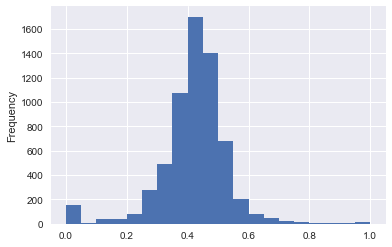

In [68]:
fake.subjectivity.plot(kind="hist", bins=20);

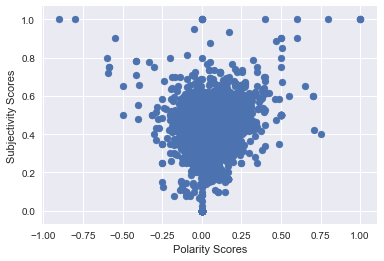

In [69]:
#Plot scatter plot of polarity vs subjectivity scores
plt.scatter(fake.polarity, fake.subjectivity)
plt.xlabel("Polarity Scores")
plt.ylabel("Subjectivity Scores");

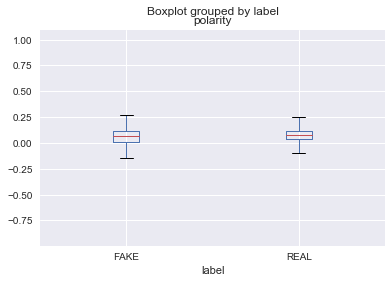

In [71]:
#Plot boxplots of the polarity by yelp stars
fake.boxplot(column='polarity', by='label');

## Part 9: Calculating "spaminess" of a token

In [74]:
#Load in ham or spam text dataset
df = pd.read_table("../../datasets/spam/sms.tsv",encoding="utf-8", names= ["label", "message"])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [75]:
#Look at null accuracy
df.label.value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [76]:
X = df.message
y = df.label
vect =CountVectorizer()
Xdtm = vect.fit_transform(X)
nb = MultinomialNB()
nb.fit(Xdtm,y)
nb.score(Xdtm,y)

0.99353912419239054

In [77]:
tokens = vect.get_feature_names()
len(tokens)

8713

In [78]:
#Print first 50 features
print vect.get_feature_names()[:50]

[u'00', u'000', u'000pes', u'008704050406', u'0089', u'0121', u'01223585236', u'01223585334', u'0125698789', u'02', u'0207', u'02072069400', u'02073162414', u'02085076972', u'021', u'03', u'04', u'0430', u'05', u'050703', u'0578', u'06', u'07', u'07008009200', u'07046744435', u'07090201529', u'07090298926', u'07099833605', u'07123456789', u'0721072', u'07732584351', u'07734396839', u'07742676969', u'07753741225', u'0776xxxxxxx', u'07781482378', u'07786200117', u'077xxx', u'078', u'07801543489', u'07808', u'07808247860', u'07808726822', u'07815296484', u'07821230901', u'078498', u'07880867867', u'0789xxxxxxx', u'07946746291', u'0796xxxxxx']


In [79]:
#Print random slice of features
print vect.get_feature_names()[3200:3250]

[u'fifteen', u'fifth', u'fifty', u'fight', u'fighting', u'fightng', u'fights', u'figure', u'figures', u'figuring', u'file', u'files', u'fill', u'filled', u'filling', u'fills', u'film', u'films', u'filth', u'filthy', u'filthyguys', u'final', u'finalise', u'finally', u'finance', u'financial', u'find', u'finding', u'finds', u'fine', u'finest', u'fingers', u'finish', u'finishd', u'finished', u'finishes', u'finishing', u'fink', u'finn', u'fire', u'fired', u'firefox', u'fireplace', u'fires', u'firmware', u'firsg', u'first', u'fish', u'fishhead', u'fishrman']


In [80]:
#How many times does a word appear in each class
nb.feature_count_

array([[  0.,   0.,   1., ...,   1.,   0.,   1.],
       [ 10.,  29.,   0., ...,   0.,   1.,   0.]])

In [81]:
nb.feature_count_.shape

(2, 8713)

In [82]:
ham_token_count = nb.feature_count_[0,:]
ham_token_count

array([ 0.,  0.,  1., ...,  1.,  0.,  1.])

In [83]:
spam_token_count = nb.feature_count_[1, :]
spam_token_count

array([ 10.,  29.,   0., ...,   0.,   1.,   0.])

In [84]:
# create a DataFrame of tokens with their separate ham and spam counts
df_tokens = pd.DataFrame({'token':tokens, 'ham':ham_token_count, 'spam':spam_token_count}).set_index('token')
df_tokens.sample(10, random_state=3)

,ham,spam
token,,
missions,1.0,0.0
residency,1.0,0.0
reset,1.0,0.0
chat80155,0.0,1.0
tight,2.0,0.0
another,35.0,2.0
gentleman,3.0,0.0
apply,2.0,30.0
4the,1.0,0.0


In [85]:
# add 1 to ham and spam counts to avoid dividing by 0
df_tokens['ham'] = df_tokens.ham + 1
df_tokens['spam'] = df_tokens.spam + 1
df_tokens.sample(10, random_state=3)

,ham,spam
token,,
missions,2.0,1.0
residency,2.0,1.0
reset,2.0,1.0
chat80155,1.0,2.0
tight,3.0,1.0
another,36.0,3.0
gentleman,4.0,1.0
apply,3.0,31.0
4the,2.0,1.0


In [86]:
# Naive Bayes counts the number of observations in each class
nb.class_count_

array([ 4825.,   747.])

In [87]:
# convert the ham and spam counts into frequencies
df_tokens['ham'] = df_tokens.ham / nb.class_count_[0]
df_tokens['spam'] = df_tokens.spam / nb.class_count_[1]
df_tokens.sample(10, random_state=3)

,ham,spam
token,,
missions,0.000415,0.001339
residency,0.000415,0.001339
reset,0.000415,0.001339
chat80155,0.000207,0.002677
tight,0.000622,0.001339
another,0.007461,0.004016
gentleman,0.000829,0.001339
apply,0.000622,0.041499
4the,0.000415,0.001339


In [88]:
# calculate the ratio of spam-to-ham for each token
df_tokens['spam_ratio'] = df_tokens.spam / df_tokens.ham
df_tokens.sample(10, random_state=3)

,ham,spam,spam_ratio
token,,,
missions,0.000415,0.001339,3.229585
residency,0.000415,0.001339,3.229585
reset,0.000415,0.001339,3.229585
chat80155,0.000207,0.002677,12.918340
tight,0.000622,0.001339,2.153057
another,0.007461,0.004016,0.538264
gentleman,0.000829,0.001339,1.614793
apply,0.000622,0.041499,66.744757
4the,0.000415,0.001339,3.229585


In [89]:
# examine the DataFrame sorted by spam_ratio
df_tokens.sort_values('spam_ratio', ascending=False).head(10)

,ham,spam,spam_ratio
token,,,
claim,0.000207,0.152610,736.345382
prize,0.000207,0.125837,607.161981
150p,0.000207,0.096386,465.060241
tone,0.000207,0.081660,394.009371
18,0.000207,0.069612,335.876841
guaranteed,0.000207,0.068273,329.417671
500,0.000207,0.060241,290.662651
cs,0.000207,0.060241,290.662651
1000,0.000207,0.056225,271.285141


In [90]:
#Try looking up scores of different words
word = "win"
df_tokens.loc[word, 'spam_ratio']

32.295850066934406

### What is NLP after all?
---

- NLP is a gigantic field
- Understanding the basics broadens the types of data you can work with
- Simple techniques go a long way
- Use scikit-learn for NLP whenever possible

# Lab time
- There are three other datasets pitchfork album reviews, fake/real news, and political lean.
- Pick one of those three datasets and try to build a model that differentiate between good/bad review, real/fake news, or liberal/conservative leaning. Make sure to examine the false positives and the false negatives texts. Use the "spamminess" technique on the corpus as well. 
- Use both count and tfidf vectorizers. Use textblob to determine sentiment and polarity.
- I've included some bonus material if you want to explore. 
    
    -How to summarize a text
    
    -How to use gridsearch to find the optimal parameters for countvectorizer.
    

## Bonus: Using TF-IDF to Summarize a Yelp Review

Reddit's autotldr uses the [SMMRY](http://smmry.com/about) algorithm, which is based on TF-IDF!

In [91]:
def summarize():
    # choose a random review that is at least 300 characters
    review_length = 0
    while review_length < 300:
        review_id = np.random.randint(0, len(yelp))
        review_text = yelp.text[review_id]
        review_length = len(review_text)
    # create a dictionary of words and their TF-IDF scores
    word_scores = {}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id, features.index(word)]
    
    # print words with the top 5 TF-IDF scores
    print 'TOP SCORING WORDS:'
    top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print word
    
    # print 5 random words
    print '\n' + 'RANDOM WORDS:'
    random_words = np.random.choice(word_scores.keys(), size=5, replace=False)
    for word in random_words:
        print word
    
    # print the review
    print '\n' + review_text

In [92]:
summarize()

TOP SCORING WORDS:
manager
husband
reviews
mistake
fix

RANDOM WORDS:
bump
husband
called
review
calling

My husband and I tried this place out since it is fairly close to our house and gets decent reviews.  I drank, my husband ate.  The wine selection is ok and the staff seemed friendly.  My husband's dinner was okay.  I'd probably give this place better reviews had they not attempted to give themselves a $15 bump on their tip.  I'd also probably give them better reviews if the manager would have called me back after leaving a message with a staff member about the charge especially when I left all the details necessary to fix the issue and was promised a call back that afternoon when the manager arrived.  Now, I can only assume it was not an inadvertent mistake since they give me no reason to believe otherwise.  I really would rather not have to keep calling back and chase my $$ down.

Edited review - took them from 1 star to 3 stars since I received a phone call today from a manager 

## Gridsearch/pipelining and vectorization

Pipeline: function that passes new dataset to minimize the amount of time in running notebooks. 
Instead of doing one step at a time analysis,we can combine all of those codes in a more efficient way, so it runs all at once.

In [93]:
from sklearn.grid_search import GridSearchCV

//anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [94]:
#make a pipeline 
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(CountVectorizer(), MultinomialNB())

In [95]:
#pipe steps
pipe.steps

[('countvectorizer',
  CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
          dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
          lowercase=True, max_df=1.0, max_features=None, min_df=1,
          ngram_range=(1, 1), preprocessor=None, stop_words=None,
          strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
          tokenizer=None, vocabulary=None)),
 ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]

In [96]:
#Set range of parameters
param_grid = {}
param_grid["countvectorizer__max_features"] = [1000,5000,10000]
param_grid["countvectorizer__ngram_range"] = [(1,1), (1,2), (2,2)]
param_grid["countvectorizer__lowercase"] = [True, False]
param_grid["countvectorizer__analyzer"] = ["word", word_tokenize_lemma]

In [97]:
from sklearn.grid_search import GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', verbose=1)

In [98]:
#This will take a while
grid.fit(X,y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  5.8min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('countvectorizer', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=Non..., vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'countvectorizer__lowercase': [True, False], 'countvectorizer__ngram_range': [(1, 1), (1, 2), (2, 2)], 'countvectorizer__analyzer': ['word', <function word_tokenize_lemma at 0x1287d40c8>], 'countvectorizer__max_features': [1000, 5000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=1)

In [99]:
#Look at the best parameters and the best scores
print(grid.best_params_)
print(grid.best_score_)

{'countvectorizer__analyzer': 'word', 'countvectorizer__ngram_range': (1, 2), 'countvectorizer__lowercase': False, 'countvectorizer__max_features': 10000}
0.986180904523


In [100]:
#Helpful for understanding how to create your param grid.
grid.get_params().keys()

['n_jobs',
 'verbose',
 'estimator__countvectorizer__vocabulary',
 'estimator__countvectorizer',
 'estimator__countvectorizer__token_pattern',
 'estimator__steps',
 'param_grid',
 'cv',
 'estimator__countvectorizer__binary',
 'scoring',
 'estimator__countvectorizer__analyzer',
 'estimator__multinomialnb__alpha',
 'estimator__countvectorizer__max_features',
 'pre_dispatch',
 'estimator__countvectorizer__strip_accents',
 'estimator__countvectorizer__stop_words',
 'estimator__multinomialnb__fit_prior',
 'estimator__countvectorizer__input',
 'fit_params',
 'estimator__countvectorizer__preprocessor',
 'refit',
 'iid',
 'estimator__countvectorizer__encoding',
 'estimator__countvectorizer__decode_error',
 'estimator__countvectorizer__tokenizer',
 'estimator__countvectorizer__dtype',
 'estimator__countvectorizer__ngram_range',
 'estimator__countvectorizer__min_df',
 'estimator__multinomialnb__class_prior',
 'estimator__countvectorizer__lowercase',
 'estimator',
 'error_score',
 'estimator__mul